In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
train =pd.read_excel("Downloads/Data/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

In [3]:
test =pd.read_excel("Downloads/Data/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
train['source'] = 'train'
test['source'] = 'test'

In [7]:
data = pd.concat([train, test])

In [8]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,test
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,test


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  source           13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [10]:
data.duplicated().sum()

246

In [11]:
data.drop_duplicates(inplace=True)


In [12]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2645
source                0
dtype: int64

In [13]:
data.dropna(subset=['Route', 'Total_Stops'], inplace=True)

# Convert date of journey to weekdays

In [14]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [15]:
data['Date_of_Journey_to_weekdays']=data['Date_of_Journey'].dt.day_name()

In [16]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_to_weekdays
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,Friday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,Thursday


# Convert date of journey to specify Holiday

In [ ]:
!pip install holidays


In [17]:
from datetime import date
import holidays

In [18]:
country_code='India'
India_holidays = holidays.CountryHoliday(country_code)
data = pd.DataFrame(data)

In [19]:
data['Is_public_holiday'] = data['Date_of_Journey'].apply(lambda x:'yes' if x in India_holidays else 'no')

In [20]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_to_weekdays,Is_public_holiday
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,Sunday,no
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,Saturday,no


In [ ]:
data['Is_public_holiday'].value_counts()

In [21]:
data.drop(columns='Date_of_Journey',inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Airline                      13107 non-null  object 
 1   Source                       13107 non-null  object 
 2   Destination                  13107 non-null  object 
 3   Route                        13107 non-null  object 
 4   Dep_Time                     13107 non-null  object 
 5   Arrival_Time                 13107 non-null  object 
 6   Duration                     13107 non-null  object 
 7   Total_Stops                  13107 non-null  object 
 8   Additional_Info              13107 non-null  object 
 9   Price                        10462 non-null  float64
 10  source                       13107 non-null  object 
 11  Date_of_Journey_to_weekdays  13107 non-null  object 
 12  Is_public_holiday            13107 non-null  object 
dtypes: float64(1), ob

# convert duration into minutes

In [ ]:
''''data['Duration_Min'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(int)

In [23]:
def convert_to_minutes(time_str):
    parts = time_str.split()
    total_minutes = 0
    
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
    
    return total_minutes
    

In [24]:
data['Duration_in_minutes']=data['Duration'].apply(convert_to_minutes)

In [25]:
data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Date_of_Journey_to_weekdays,Is_public_holiday,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train,Sunday,no,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train,Saturday,no,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train,Friday,no,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train,Thursday,no,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train,Thursday,no,285


In [26]:
data.drop(columns='Duration',inplace=True)

In [27]:
data.drop(columns='Route',inplace=True)

# convert dep_time & arrival_time to morning afternoon etc

In [28]:
def categorize_time(time):
    if time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time < pd.to_datetime('18:00:00').time():
        return 'Afternoon'
    elif time < pd.to_datetime('21:00:00').time():
        return 'Evening'
    else:
        return 'Night'

In [29]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time']).dt.time

In [30]:
data['Dep_Time_of_the_day'] = data['Dep_Time'].apply(categorize_time)

In [31]:
data['Arrival_Time_of_the_day'] = data['Dep_Time'].apply(categorize_time)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13107 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Airline                      13107 non-null  object 
 1   Source                       13107 non-null  object 
 2   Destination                  13107 non-null  object 
 3   Dep_Time                     13107 non-null  object 
 4   Arrival_Time                 13107 non-null  object 
 5   Total_Stops                  13107 non-null  object 
 6   Additional_Info              13107 non-null  object 
 7   Price                        10462 non-null  float64
 8   source                       13107 non-null  object 
 9   Date_of_Journey_to_weekdays  13107 non-null  object 
 10  Is_public_holiday            13107 non-null  object 
 11  Duration_in_minutes          13107 non-null  int64  
 12  Dep_Time_of_the_day          13107 non-null  object 
 13  Arrival_Time_of_t

In [33]:
data.drop(columns='Dep_Time',inplace=True)

In [34]:
data.drop(columns='Arrival_Time',inplace=True)

In [35]:
data['Additional_Info'].value_counts()

No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [36]:
data.drop(columns='Additional_Info',inplace=True)

In [37]:
data["Total_Stops"].value_counts()

1 stop      7052
non-stop    4321
2 stops     1678
3 stops       54
4 stops        2
Name: Total_Stops, dtype: int64

In [38]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [39]:
data.head(1)

,Airline,Source,Destination,Total_Stops,Price,source,Date_of_Journey_to_weekdays,Is_public_holiday,Duration_in_minutes,Dep_Time_of_the_day,Arrival_Time_of_the_day
0,IndiGo,Banglore,New Delhi,0,3897.0,train,Sunday,no,170,Night,Night


In [40]:
data_cat = data.select_dtypes(exclude = np.number)

In [44]:
data_cat.columns

Index(['Airline', 'Source', 'Destination', 'source',
       'Date_of_Journey_to_weekdays', 'Is_public_holiday',
       'Dep_Time_of_the_day', 'Arrival_Time_of_the_day'],
      dtype='object')

In [43]:
data_cat.drop(columns = 'source')

,Airline,Source,Destination,Date_of_Journey_to_weekdays,Is_public_holiday,Dep_Time_of_the_day,Arrival_Time_of_the_day
0,IndiGo,Banglore,New Delhi,Sunday,no,Night,Night
1,Air India,Kolkata,Banglore,Saturday,no,Morning,Morning
2,Jet Airways,Delhi,Cochin,Friday,no,Morning,Morning
3,IndiGo,Kolkata,Banglore,Thursday,no,Evening,Evening
4,IndiGo,Banglore,New Delhi,Thursday,no,Afternoon,Afternoon
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,Thursday,no,Evening,Evening
2667,IndiGo,Kolkata,Banglore,Wednesday,no,Afternoon,Afternoon
2668,Jet Airways,Delhi,Cochin,Monday,no,Night,Night
2669,Air India,Delhi,Cochin,Monday,no,Morning,Morning


In [45]:
data_cat = pd.get_dummies(data_cat)

In [46]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [47]:
data_num = data.select_dtypes(include = np.number)

In [48]:
data_num = data_num.reset_index().drop(columns = 'index')

In [49]:
data_source = data['source'].reset_index().drop(columns = 'index')

In [68]:
data_preprocessed = pd.concat([data_cat,data_num,data_source],axis = 1)

In [69]:
data_preprocessed.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Dep_Time_of_the_day_Morning,Dep_Time_of_the_day_Night,Arrival_Time_of_the_day_Afternoon,Arrival_Time_of_the_day_Evening,Arrival_Time_of_the_day_Morning,Arrival_Time_of_the_day_Night,Total_Stops,Price,Duration_in_minutes,source
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,3897.0,170,train
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,2,7662.0,445,train


In [70]:
data_preprocessed.shape

(13107, 46)

In [71]:
data_preprocessed['source'].value_counts()

train    10462
test      2645
Name: source, dtype: int64

In [82]:
data_preprocessed_train = data_preprocessed[data_preprocessed['source']=='train']

In [86]:
data_preprocessed_train.shape

(10462, 46)

In [85]:
data_preprocessed_train_x = data_preprocessed_train.drop(columns = ['Price'])

In [87]:
data_preprocessed_train_x = data_preprocessed_train_x.drop(columns = ['source'])

In [88]:
data_preprocessed_train_x.shape

(10462, 44)

In [89]:
data_preprocessed_train_y = data_preprocessed_train['Price']

In [90]:
data_preprocessed_train_x.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'source_test', 'source_train',
       'Date_of_Journey_to_weekdays_Friday',
       'Date_of_Journey_to_weekdays_Monday',
       'Date_of_Journey_to_weekdays_Saturday',
       'Date_of_Journey_to_weekdays_Sunday',
       'Date_of_Journey_to_weekdays_Thursday',
       'Date_of_Journey_to_weekdays_Tuesday',
       'Date_of_Journey_to_weekdays_Wednesday', 'Is_public_holiday_no',
       'Is_public_holiday_yes', 'D

<AxesSubplot:xlabel='Duration_in_minutes', ylabel='Price'>

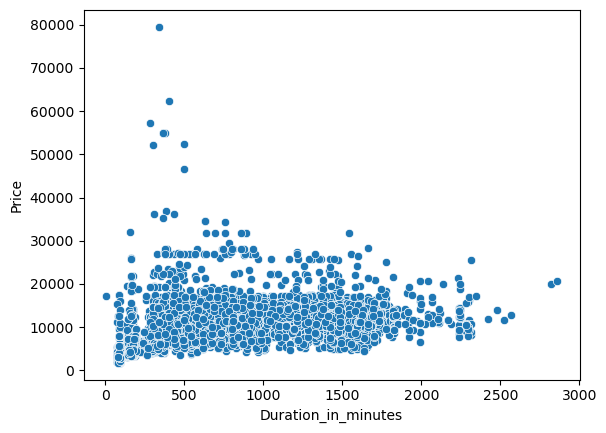

In [94]:
sns.scatterplot(data_preprocessed_train_x['Duration_in_minutes'], data_preprocessed_train_y)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

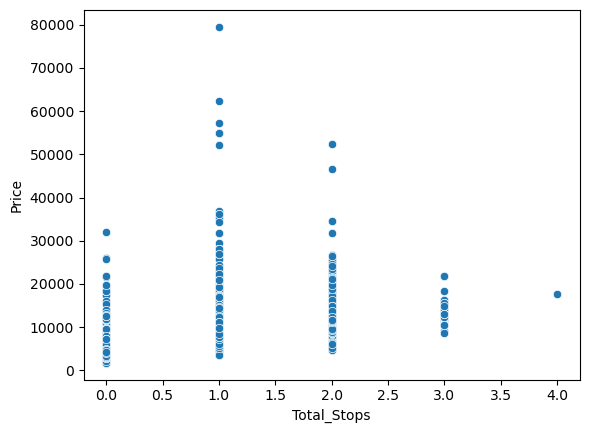

In [96]:
sns.scatterplot(data_preprocessed_train_x['Total_Stops'], data_preprocessed_train_y)

# single linear regression

# price vs duration 

In [92]:
reg = LinearRegression()

In [97]:
reg.fit(data_preprocessed_train_x[['Duration_in_minutes']], data_preprocessed_train_y)

LinearRegression()

In [98]:
reg.intercept_

6107.985446643377

In [99]:
reg.coef_

array([4.6346303])

In [ ]:
price=6107.98+4.63(duration_in_minutes)

In [100]:
train_predict = reg.predict(data_preprocessed_train_x[['Duration_in_minutes']])

In [103]:
train_predict

array([ 6895.8725977 ,  8170.3959303 , 11391.46398905, ...,
        6942.21890071,  6849.5262947 ,  8425.30059682])

Text(0, 0.5, 'price')

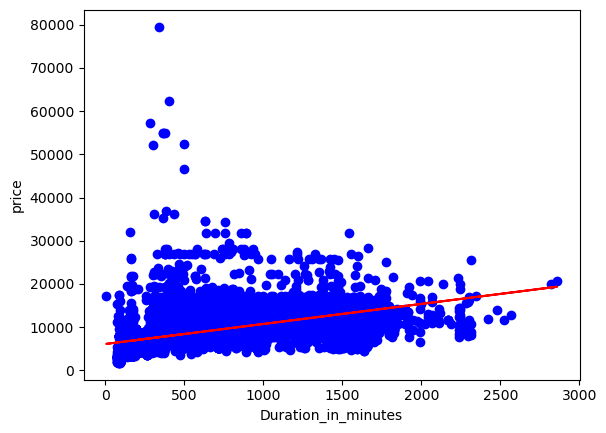

In [104]:
plt.scatter(data_preprocessed_train_x['Duration_in_minutes'], data_preprocessed_train_y, color = 'blue')
plt.plot(data_preprocessed_train_x['Duration_in_minutes'], reg.predict(data_preprocessed_train_x[['Duration_in_minutes']]), color = 'red')
plt.xlabel("Duration_in_minutes")
plt.ylabel('price')

In [126]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)

In [128]:
print("TRAIN ERROR")
returnError(data_preprocessed_train_y, reg.predict(data_preprocessed_train_x[['Duration_in_minutes']]))

TRAIN ERROR
MSE =  11470319019431.604
RMSE =  3386785.9423694913
MAE =  2650910.7334303004
MAPE =  284.20145795555396
R2 Score =  -536316.2843530038


In [105]:
reg.fit(data_preprocessed_train_x[['Total_Stops']], data_preprocessed_train_y)

LinearRegression()

In [106]:
reg.intercept_

5645.261970407704

In [107]:
reg.coef_

array([4214.62345313])

In [109]:
train_predict_stops = reg.predict(data_preprocessed_train_x[['Total_Stops']])

In [110]:
train_predict_stops

array([ 5645.26197041, 14074.50887667, 14074.50887667, ...,
        5645.26197041,  5645.26197041, 14074.50887667])

Text(0, 0.5, 'price')

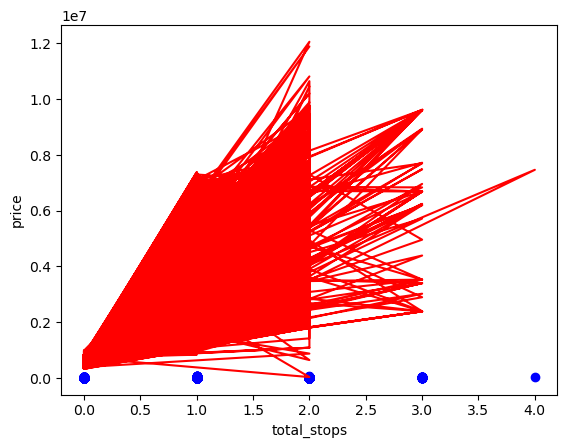

In [111]:
plt.scatter(data_preprocessed_train_x['Total_Stops'], data_preprocessed_train_y, color = 'blue')
plt.plot(data_preprocessed_train_x['Total_Stops'], reg.predict(data_preprocessed_train_x[['Duration_in_minutes']]), color = 'red')
plt.xlabel("total_stops")
plt.ylabel('price')

In [118]:
data_preprocessed_test = data_preprocessed[data_preprocessed['source']=='test']

In [119]:
data_preprocessed_test.shape

(2645, 46)

In [120]:
data_preprocessed_test_x = data_preprocessed_test.drop(columns = ['source'])

In [121]:
data_preprocessed_test_x = data_preprocessed_test_x.drop(columns = ['Price'])

In [122]:
data_preprocessed_train_x.shape

(10462, 44)

In [123]:
data_preprocessed_test_x.shape

(2645, 44)

In [124]:
test_predict = reg.predict(data_preprocessed_test_x[['Duration_in_minutes']])

In [125]:
test_predict

array([2766223.62377223, 1017154.89072222, 6011483.68268429, ...,
       1670421.52595776, 3862025.72158669, 3630221.4316644 ])

# multiplelinear regression

In [130]:
reg = LinearRegression()

In [131]:
reg.fit(data_preprocessed_train_x, data_preprocessed_train_y)

LinearRegression()

In [132]:
reg.intercept_

27704461857597.582

In [133]:
reg.coef_

array([-2.77044619e+13, -2.77044619e+13, -2.77044619e+13, -2.77044619e+13,
       -2.77044618e+13, -2.77044618e+13, -2.77044619e+13, -2.77044618e+13,
       -2.77044619e+13, -2.77044619e+13, -2.77044619e+13, -2.77044618e+13,
        5.76704786e+02,  4.81828438e+01, -4.12268756e+00,  1.02477137e+02,
       -7.50975618e+02,  1.05434376e+02, -6.52112204e+00, -1.29480862e+03,
       -7.39258821e+02,  6.20402657e+01,  1.87312985e+03, -2.73437500e-02,
       -9.76562500e-03, -7.42601059e+02,  4.10290363e+02, -3.13365753e+02,
        7.53431351e+02,  2.96794748e+02,  8.29989035e+01, -4.87678888e+02,
        7.52825861e+02, -7.52890147e+02,  5.86676003e+01, -1.13820813e+02,
       -6.38330086e+01,  1.19050466e+02,  5.85015847e+01, -1.13820813e+02,
       -6.37753914e+01,  1.18933279e+02,  2.81596986e+03,  1.03150491e-01])

In [134]:
train_predict = reg.predict(data_preprocessed_train_x)

In [135]:
train_predict

array([ 8177.828125  , 11484.73046875, 13693.20703125, ...,
        7684.01953125,  9248.390625  , 11882.0078125 ])

In [ ]:
def returnError(actual,pred):
    mse = mean_squared_error(actual,pred)
    rmse = np.sqrt(mean_squared_error(actual,pred))
    mae = mean_absolute_error(actual,pred)
    mape = mean_absolute_percentage_error(actual,pred)
    r2 = r2_score(actual,pred)
    print("MSE = ", mse)
    print("RMSE = ", rmse)
    print("MAE = ", mae)
    print("MAPE = ", mape)
    print("R2 Score = ", r2)

In [139]:
print("TRAIN ERROR")
returnError(data_preprocessed_train_y, reg.predict(data_preprocessed_train_x))

TRAIN ERROR
MSE =  8213809.242394707
RMSE =  2865.9743966746646
MAE =  1981.958520643161
MAPE =  0.23853034196872458
R2 Score =  0.6159472234719914


# polynomial regression

In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [145]:
train_X_poly = poly.fit_transform(data_preprocessed_train_x)
test_X_poly = poly.transform(data_preprocessed_test_x)

In [146]:
model = LinearRegression()
model.fit(train_X_poly, data_preprocessed_train_y)

LinearRegression()

In [147]:
train_predict_poly = model.predict(train_X_poly)
test_predict_poly = model.predict(test_X_poly)

In [148]:
train_predict_poly

array([ 6374.31333352, 12541.96233624, 12837.0367373 , ...,
        6599.87332453, 17487.09779674, 11291.32210125])

In [150]:
print("TRAIN ERROR")
returnError(data_preprocessed_train_y, train_predict_poly)

TRAIN ERROR
MSE =  5696997.383448079
RMSE =  2386.838365589107
MAE =  1663.5847134146115
MAPE =  0.19434749191807354
R2 Score =  0.7336257029572619


In [149]:
test_predict_poly

array([6083.85985167, 2475.06112896, 3414.24353836, ..., 8769.28448188,
       3084.63531114, 2988.47478374])

In [153]:
residual = data_preprocessed_train_y - train_predict

<AxesSubplot:xlabel='Price', ylabel='Density'>

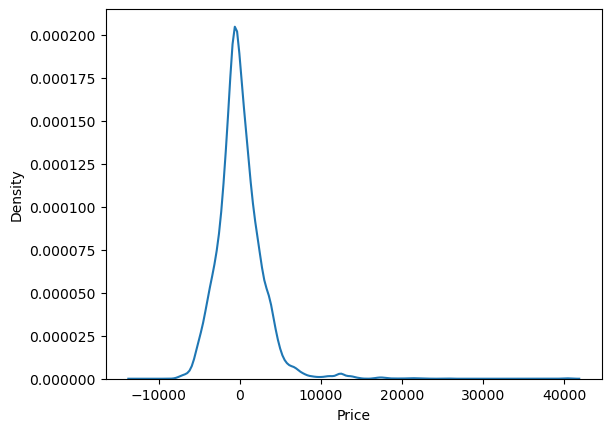

In [154]:
sns.kdeplot(residual)